In [23]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

### Loading the Data


In [38]:
data_path = 'dataset/hour.csv'
ride_data = pd.read_csv(data_path)
ride_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


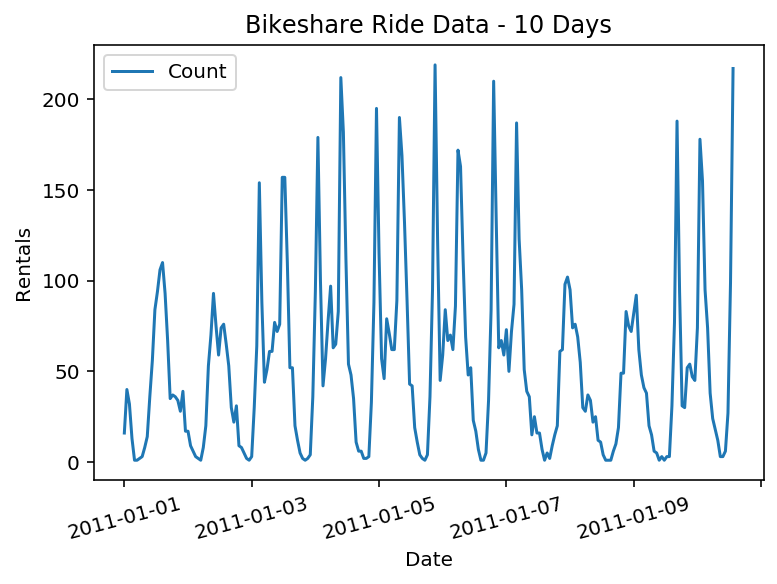

In [39]:
days = 24*10
ride_data[:days].plot(x='dteday', y='cnt', label='Count')
plt.title(label='Bikeshare Ride Data - 10 Days')
plt.ylabel('Rentals')
plt.xlabel('Date')
plt.xticks(rotation = 15)
plt.show()

## Dummy Variables  

In [40]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

for field in dummy_fields:
    dummies = pd.get_dummies(ride_data[field], prefix=field, drop_first=False)
    ride_data = pd.concat([ride_data, dummies], axis=1)

fields_to_drop = ['dteday', 'instant', 'season', 'weathersit', 'weekday', 'atemp', 'workingday']
data = ride_data.drop(fields_to_drop, axis=1)
data.head()


,yr,mnth,hr,holiday,temp,hum,windspeed,casual,registered,cnt,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,1,0,0,0.24,0.81,0.0,3,13,16,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0.22,0.80,0.0,8,32,40,...,0,0,0,0,0,0,0,0,0,1
2,0,1,2,0,0.22,0.80,0.0,5,27,32,...,0,0,0,0,0,0,0,0,0,1
3,0,1,3,0,0.24,0.75,0.0,3,10,13,...,0,0,0,0,0,0,0,0,0,1
4,0,1,4,0,0.24,0.75,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


## Scaling Data

In [41]:
cont_fields = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
scaled_features = {} # create empty dictionary
for field in cont_fields:
    mean = data[field].mean()
    std = data[field].std()
    scaled_features[field] = [mean, std] # store for later to unormalize data
    data.loc[:,field] = (data[field] - mean) / std # normalize data

data.head()

,yr,mnth,hr,holiday,temp,hum,windspeed,casual,registered,cnt,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,1,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,...,0,0,0,0,0,0,0,0,0,1
2,0,1,2,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,...,0,0,0,0,0,0,0,0,0,1
3,0,1,3,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,...,0,0,0,0,0,0,0,0,0,1
4,0,1,4,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,...,0,0,0,0,0,0,0,0,0,1


## Test, Train, Validation Data


In [43]:
# data from last 30 days
data = data[:-30*24]

# targets (X)
target_fields = ['cnt', 'casual', 'registered'] 
targets = data[target_fields]

# features (y)
features = data.drop(target_fields, axis=1)

# test data
test_data = data[-30*24:]
# test features
test_features = test_data.drop(target_fields, axis=1)
# test targets
test_targets = test_data[target_fields]


In [49]:
print('Features - {} <---> Targets - {}'.format(features.shape, targets.shape))

Features - (16659, 58) <---> Targets - (16659, 3)
